Cheminformatics Datasets 
https://github.com/GLambard/Molecules_Dataset_Collection/tree/master/latest

In [1]:
from dl_util import *
from ml_util import *

from sklearn.preprocessing import StandardScaler
from eval_class_util import *
from run_eval import split_fit_plot_predict

Using TensorFlow backend.


### Extracting SMILES and converting into sequence 

In [2]:
esol = pd.read_csv('eval_datasets/esol_v2.csv')

In [3]:
esol_smiles = esol['smiles'].tolist()

In [4]:
len_esol_smiles = []
for SMILE in esol_smiles:
    len_esol_smiles += [len(SMILE)]
    
max_len_esol = max(len_esol_smiles)

esol_vocab_size = generate_onehot_encoding(esol_smiles,'vocab_size')
esol_vocab_size, max_len_esol

(33, 98)

In [5]:
esol_encodings = generate_onehot_encoding(esol_smiles)
esol_sequences = sequence.pad_sequences(esol_encodings, maxlen=max_len_esol)

In [6]:
#saveNumpy(esol_sequences, 'esol_sequences')
#esol_sequences = loadNumpy("esol_sequences")#X1 is esol_sequences
esol_maccs = loadNumpy('esol_maccs') #X2
esol_solubility = loadNumpy('esol_solubility') #Y

In [7]:
esol_solubility_standard = standardize_1d(esol_solubility)
esol_solubility_normal = normalize_1d(esol_solubility)
# saveNumpy(esol_solubility_standard, 'esol_standardized_solubility')

In [18]:
layers=2
optimizer ="adam"
model_type ="regression"
model = Sequential()
model.add(Embedding(esol_vocab_size,  32, input_length=max_len_esol))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
if layers==3:
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
# if optimizer == "adam" and lr!= 0.001:
#     print("Setting learning rate to"+str(lr))
#     optimizer = tf.train.AdamOptimizer(lr)

if model_type == "classification":
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc', precision,recall,auc])
else:
    model.add(Dense(1))
    model.compile(loss='mse',optimizer=optimizer, metrics=['mape'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 98, 32)            1056      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 98, 32)            3104      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 49, 32)            3104      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 24, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 769       
Total para

In [19]:
X1_train, X1_test, y_train, y_test = train_test_split(esol_sequences, esol_solubility_standard, random_state=1024)

In [22]:
model.fit(X1_train, y_train, shuffle=True, validation_split=0.1,\
                        epochs=40, batch_size=4, verbose=1)

Train on 761 samples, validate on 85 samples
Epoch 1/40
761/761 [==============================] - 2s 2ms/step - loss: 0.0295 - mean_absolute_percentage_error: 24.9151 - val_loss: 0.0050 - val_mean_absolute_percentage_error: 9.8132
Epoch 2/40
761/761 [==============================] - 1s 2ms/step - loss: 0.0050 - mean_absolute_percentage_error: 12.0236 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 6.4121
Epoch 3/40
761/761 [==============================] - 1s 2ms/step - loss: 0.0032 - mean_absolute_percentage_error: 9.3108 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 5.1381
Epoch 4/40
761/761 [==============================] - 1s 2ms/step - loss: 0.0028 - mean_absolute_percentage_error: 8.7759 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 7.3323
Epoch 5/40
761/761 [==============================] - 1s 2ms/step - loss: 0.0019 - mean_absolute_percentage_error: 7.0532 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 4.9594
Epoch 6/40
761/761 [===

In [44]:
y_predict = model.predict(X1_test).reshape(1,-1)[0]

In [42]:
y_test = np.array(y_test)

In [49]:
type(y_predict), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [27]:
y_test[:5]

[0.8193273417956083,
 0.562308903919207,
 0.8603724636338368,
 0.6301306402297786,
 0.7172241267488187]

cnn_model
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 98, 32)            1056      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 49, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________

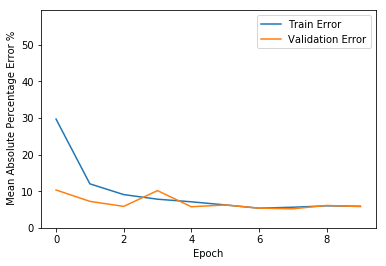

In [8]:
y_test,y_predict = split_fit_plot_predict(cnn_model,  esol_sequences, esol_maccs, esol_solubility_standard, esol_vocab_size, max_len_esol, "esol",\
                      batch_size=4, epochs=10)

In [10]:
for i in range(len(y_test)):
    item = y_test[i]
    if item == 0:
        print(item,i)

(0.0, 24)


In [11]:
for i in range(len(y_predict)):
    item = y_predict[i]
    if item == 0:
        print(item,i)

## Predictions 

cnn_model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 98, 32)            1056      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 98, 32)            3104      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 49, 32)            3104      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 769       


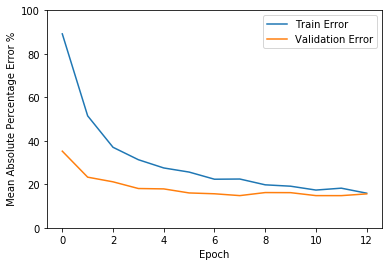

In [11]:
split_fit_plot_predict(cnn_model,  esol_sequences, esol_maccs, esol_solubility, esol_vocab_size, max_len_esol, "esol",\
                      batch_size=4, epochs=40)

rnn_model


NameError: global name 'model_type' is not defined